# Neural Networks 
## Single Layer Perceptron

Author: Rajpal Virk

### Build a single layer perceptron model from scratch in Python using only standard library (NumPy). 

Steps Involved:
1. Build a single layer perceptron model from scratch in Python using only NumPy library.
2. Deploy and Evaluate Model
    - Load dataset
    - Preprocess dataset
        - If dataset is multi-class classification problem, extract data related to 2 classes from this multiclass classification problem.
        - Split data in Train and Test data
    - Train model and evaluate model

### 1. Build a single layer perceptron model from scratch in Python using only NumPy library.

In [1]:
# import required library to build model
import numpy as np 

# Building Class Object
class SLP(object):
    
    
    # Initializing parameters
    def __init__(self, learning_rate, epochs, X):
        
        '''
        We will initalize the key parameters of model.
        4 key parameters are:
        1. Learning Rate    : Positive float value that can be controlled by user. 
        2. Epochs           : Positive integer value that can be controlled by user.
        3. Synaptic Weights : Weights in matrix form (no. of features x 1)
        4. Bias             : Positive integer or float that can be controlled by user.
        '''
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(X.shape[1]) 
        self.bias = float(1)
        pass
    
    
    
    # Calculating Linear Combiner Output
    def adder(self, X):
        '''
        This function will result in linear weighted sum of sample data, syntapic weights and bias.
        Sample data is in the matrix form (1 x number of features) and is also known as input signals.
        Synaptic weights are weights assigned to the input signals. 
        '''
        return (np.dot(X, self.weights) + self.bias)
               
        
        
        
    # Predicting Neuron Output
    def predict(self, X):
        '''
        This function calculates the activation potential and by using an 
        activation function predicts the class label.
        Activation function for this model is set at 0.5 i.e. if activation potential
        for given sample (or input signal) is below this value, model predicts that
        sample data point belongs to class 0, 
        else model predicts that sample datapoint belongs to class 1.
        '''
        
        predicted_output = np.where(self.adder(X) >= 0.5, 1 , 0)
        return predicted_output
        
    
    # Learning Process
    # Calculating errors, updating weights and training Model
    def fit(self, X, Y):
        '''
        This fit function is used to train the model.
        Errors are calculated by finding difference between desired output and predicted output.
        Weight is updated using leanring algorithm, which modifies the synaptic weights of network 
        in an orderly fashion so as to attain a desired output class. 
        '''
        
        # Empty list to store errors
        self.errors = []
        
        for _ in range(self.epochs):
            
            # Initiating errors at 0
            errors = 0
            
            # Updating Weights and Calculating Errors 
            for X_indexed, desired_output in zip(X,Y):
                delta_weights = (self.learning_rate * (desired_output - self.predict(X_indexed))) * X_indexed
                self.weights += delta_weights
                
                residual = (desired_output - self.predict(X_indexed))
                errors += int(residual !=0.0)
            self.errors.append(errors)
        return self

### Import Libraries for data loading, analysing and visualization

In [2]:
# Import required libraries

# Load dataset
from sklearn.datasets import load_iris

# Matplotlib to visualize data
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# Sklean packages for cross validation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Setting Warning to ignore
import warnings
warnings.filterwarnings('ignore')

### 2. Deploy and Evaluate Model - IRIS Dataset

In [3]:
# Load Dataset - IRIS

X, y = load_iris(return_X_y=True)
print("Shape of input features, X: ", X.shape)
print("Shape of target labels, y: ", y.shape)
print("Unique target labels: ", np.unique(y))

Shape of input features, X:  (150, 4)
Shape of target labels, y:  (150,)
Unique target labels:  [0 1 2]


From unique target labels list, we can see that the dataset is 3 class classification problem.

In [4]:
# Preprocess dataset

# Extracting first 100 data points that belong to class 0 and 1.
X = X[:100]
y = y[:100]

# Split data in Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)
print("Unique target labels in y_test: ", np.unique(y_test))

Shape of X_train:  (80, 4)
Shape of X_test:  (20, 4)
Shape of y_train:  (80,)
Shape of y_test:  (20,)
Unique target labels in y_test:  [0 1]


**Single layer perceptron results in high accuracy when data is linearly separable. So, it is always a good practice to check whether data is linearly separable or not before deploying single layer perceptron.**

Text(0.5, 1.0, 'Scatter plot showing 2 classes')

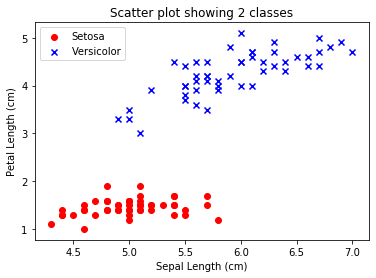

In [5]:
# Ploting classes to see whether the data is linearly separable or not

sepal_length = X[0:50, 0]
petal_length = X[0:50, 2]
color = 'r'
marker = "o"
label = "Setosa"

plt.scatter(x = sepal_length, y = petal_length, color = color, marker = marker, label = label)

sepal_length = X[50:100, 0]
petal_length = X[50:100, 2]
color = 'blue'
marker = "x"
label = "Versicolor"

plt.scatter(x = sepal_length, y = petal_length, color = color, marker = marker, label = label) 

# Adding X and Y axis labels
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")

# Adding legends
location = "upper left"
plt.legend(loc = location)
plt.title("Scatter plot showing 2 classes")

**From plot, we can confirm that data is linearly separable.**

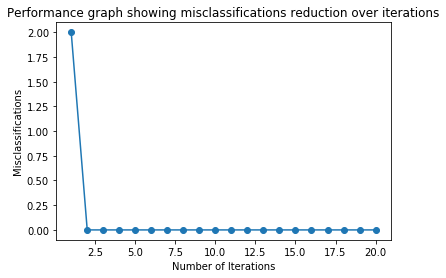

########################################################################### 

Binary classification for class 0 and 1

 Accuracy Score on Test data:  1.0

 Confusion Matrix: 
 [[10  0]
 [ 0 10]]

 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

########################################################################### 



In [6]:
# Train model and evaluate model

model = SLP(learning_rate=0.01, epochs=20, X=X_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Check the performance of model by ploting the errors to show whether the errors are dropping
epochs = range(1,(1+len(model.errors)))
misclassfication = model.errors
marker = "o"
plt.xlabel("Number of Iterations")
plt.ylabel("Misclassifications")
plt.title('Performance graph showing misclassifications reduction over iterations')
plt.plot(epochs,misclassfication,marker = marker)
plt.show()

print('########################################################################### \n')
print('Binary classification for class 0 and 1')
print("\n Accuracy Score on Test data: ", accuracy_score(y_pred, y_test))
print("\n Confusion Matrix: \n", confusion_matrix(y_pred, y_test))
print("\n Classification Report: \n", classification_report(y_pred, y_test))
print('########################################################################### \n')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


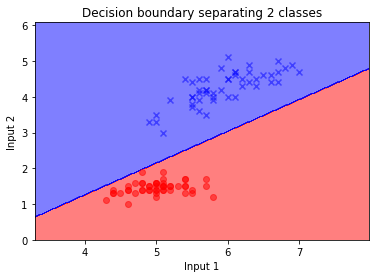

In [7]:
# Defining function to plot decision boundary
def decision_boundry(X, y, classifier, resolution = 0.02):
    """
    In this function, we pass, X and y data along with model to eventually test whether our model
    is able to draw a precise decision boundry to separate 2 classes or not. 
    """
    
    markers = ("o", "x")
    colors = ("red","blue")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min()-1, X[:, 0].max() +1
    x2_min, x2_max = X[:,1].min()-1, X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha = 0.5, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],alpha = 0.5,c= cmap(idx),marker = markers[idx])
        
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title("Decision boundary separating 2 classes")

# Plotting the decision boundary using whole dataset
# Extracting 2 features to draw 2D plot and data related to class 0 and 1.
X = X[:100, [0,2]]                              
y = y[:100]

# Build and Train new model instance using only 2 input features. 
model = SLP(learning_rate=0.01, epochs=20, X=X)
model.fit(X, y)
classifier = model

# Plot decision boundary
decision_boundry(X,y,classifier = model,resolution = 0.02)